<a href="https://colab.research.google.com/github/vyshnaviroyal/ABM-Module/blob/main/suts_edu_project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet kaggle seaborn folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import glob
import os


In [ ]:
# Uploaded kaggle.json file
from google.colab import files
if not os.path.exists('/content/kaggle.json'):
    print("Please upload your kaggle.json (Kaggle API key).")
    uploaded = files.upload()
    for fn in uploaded:
        os.rename(fn, '/content/kaggle.json')

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Download Uber Pickups dataset
!kaggle datasets download -d fivethirtyeight/uber-pickups-in-new-york-city -p /content -q
!unzip -o /content/uber-pickups-in-new-york-city.zip -d /content/uber_data


Dataset URL: https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city
License(s): CC0-1.0
Archive:  /content/uber-pickups-in-new-york-city.zip
  inflating: /content/uber_data/Uber-Jan-Feb-FOIL.csv  
  inflating: /content/uber_data/other-American_B01362.csv  
  inflating: /content/uber_data/other-Carmel_B00256.csv  
  inflating: /content/uber_data/other-Dial7_B00887.csv  
  inflating: /content/uber_data/other-Diplo_B01196.csv  
  inflating: /content/uber_data/other-FHV-services_jan-aug-2015.csv  
  inflating: /content/uber_data/other-Federal_02216.csv  
  inflating: /content/uber_data/other-Firstclass_B01536.csv  
  inflating: /content/uber_data/other-Highclass_B01717.csv  
  inflating: /content/uber_data/other-Lyft_B02510.csv  
  inflating: /content/uber_data/other-Prestige_B01338.csv  
  inflating: /content/uber_data/other-Skyline_B00111.csv  
  inflating: /content/uber_data/uber-raw-data-apr14.csv  
  inflating: /content/uber_data/uber-raw-data-aug14.csv  
  infl

In [ ]:
#  Step 3 : Load and combine all CSV files
import pandas as pd
import glob

# Look for all CSV files in the folder
files = glob.glob('/content/uber_data/*.csv')
print("Found CSV files:", files)

# Load all CSVs and handle different encodings
df_list = []
for f in files:
    try:
        df = pd.read_csv(f, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(f, encoding='latin1')
    df_list.append(df)

# Combine all dataframes
data = pd.concat(df_list, ignore_index=True)

# Convert date column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

# Show data info
print(" Total Rows:", len(data))
print(" Columns:", data.columns.tolist())

# Display first few rows
data.head()


Found CSV files: ['/content/uber_data/other-Federal_02216.csv', '/content/uber_data/other-Prestige_B01338.csv', '/content/uber_data/uber-raw-data-janjune-15.csv', '/content/uber_data/other-Highclass_B01717.csv', '/content/uber_data/other-Diplo_B01196.csv', '/content/uber_data/uber-raw-data-apr14.csv', '/content/uber_data/other-American_B01362.csv', '/content/uber_data/Uber-Jan-Feb-FOIL.csv', '/content/uber_data/uber-raw-data-aug14.csv', '/content/uber_data/other-Carmel_B00256.csv', '/content/uber_data/uber-raw-data-jul14.csv', '/content/uber_data/uber-raw-data-sep14.csv', '/content/uber_data/uber-raw-data-may14.csv', '/content/uber_data/uber-raw-data-jun14.csv', '/content/uber_data/other-Skyline_B00111.csv', '/content/uber_data/other-Dial7_B00887.csv', '/content/uber_data/other-Lyft_B02510.csv', '/content/uber_data/other-FHV-services_jan-aug-2015.csv', '/content/uber_data/other-Firstclass_B01536.csv']
✅ Total Rows: 20508122
✅ Columns: ['Date', 'Time', 'PU_Address', 'DO_Address', 'Routi

Date      Time                                  PU_Address  \
0  07/01/2014  07:15 AM  Brooklyn Museum, 200 Eastern Pkwy., BK NY;   
1  07/01/2014  07:30 AM              33 Robert Dr., Short Hills NJ;   
2  07/01/2014  08:00 AM                    60 Glenmore Ave., BK NY;   
3  07/01/2014  09:00 AM                     128 East 31 St., BK NY;   
4  07/01/2014  09:30 AM                139-39 35 Ave., Flushing NY;   

                                          DO_Address  \
0                         1 Brookdale Plaza, BK NY;    
1  John F Kennedy International Airport, vitona A...   
2                        2171 Nostrand Ave., BK NY;    
3                              369 93rd St., BK NY;    
4                               La Guardia Airport;    

                                     Routing Details  \
0  PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...   
1  PU: 33 Robert Dr., Short Hills NJ; DO: John F ...   
2  PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...   
3  PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...   
4  PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...   

                                        PU_Address.1     Status DATE TIME  \
0  Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...  Cancelled  NaN  NaN   
1  33 Robert Dr., Short Hills NJ; DO: John F Kenn...    Arrived  NaN  NaN   
2  60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...   Assigned  NaN  NaN   
3  128 East 31 St., BK NY; DO: 369 93rd St., BK NY;    Assigned  NaN  NaN   
4  139-39 35 Ave., Flushing NY; DO: La Guardia Ai...   Assigned  NaN  NaN   

  PICK UP ADDRESS  ... Address Street time_of_trip  start_lat start_lng  \
0             NaN  ...     NaN    NaN          NaN        NaN       NaN   
1             NaN  ...     NaN    NaN          NaN        NaN       NaN   
2             NaN  ...     NaN    NaN          NaN        NaN       NaN   
3             NaN  ...     NaN    NaN          NaN        NaN       NaN   
4             NaN  ...     NaN    NaN          NaN        NaN       NaN   

   Base Number  Base Name Pick Up Date Number of Trips  Number of Vehicles  
0          NaN        NaN          NaN             NaN                 NaN  
1          NaN        NaN          NaN             NaN                 NaN  
2          NaN        NaN          NaN             NaN                 NaN  
3          NaN        NaN          NaN             NaN                 NaN  
4          NaN        NaN          NaN             NaN                 NaN  

[5 rows x 41 columns]

In [ ]:
# Step 4: Add Time Columns (day, hour, month, weekday)
import pandas as pd
import glob

#  Reload data if it doesn't exist
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

#  Create new time columns
data['day'] = data['Date/Time'].dt.day
data['hour'] = data['Date/Time'].dt.hour
data['month'] = data['Date/Time'].dt.month_name()
data['weekday'] = data['Date/Time'].dt.day_name()

print("Columns:", data.columns.tolist())
data.head()



Columns: ['Date', 'Time', 'PU_Address', 'DO_Address', 'Routing Details', 'PU_Address.1', 'Status', 'DATE', 'TIME', 'PICK UP ADDRESS', 'Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num', 'locationID', 'Date/Time', 'Lat', 'Lon', 'Base', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'dispatching_base_number', 'date', 'active_vehicles', 'trips', 'PU_Adress', 'Base_No', '    Street_Address ', '    City_State ', 'State', 'PuFrom', 'Address', 'Street', 'time_of_trip', 'start_lat', 'start_lng', 'Base Number', 'Base Name', 'Pick Up Date', 'Number of Trips', 'Number of Vehicles', 'hour', 'weekday', 'day', 'month']


Date      Time                                  PU_Address  \
0  07/01/2014  07:15 AM  Brooklyn Museum, 200 Eastern Pkwy., BK NY;   
1  07/01/2014  07:30 AM              33 Robert Dr., Short Hills NJ;   
2  07/01/2014  08:00 AM                    60 Glenmore Ave., BK NY;   
3  07/01/2014  09:00 AM                     128 East 31 St., BK NY;   
4  07/01/2014  09:30 AM                139-39 35 Ave., Flushing NY;   

                                          DO_Address  \
0                         1 Brookdale Plaza, BK NY;    
1  John F Kennedy International Airport, vitona A...   
2                        2171 Nostrand Ave., BK NY;    
3                              369 93rd St., BK NY;    
4                               La Guardia Airport;    

                                     Routing Details  \
0  PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...   
1  PU: 33 Robert Dr., Short Hills NJ; DO: John F ...   
2  PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...   
3  PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...   
4  PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...   

                                        PU_Address.1     Status DATE TIME  \
0  Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...  Cancelled  NaN  NaN   
1  33 Robert Dr., Short Hills NJ; DO: John F Kenn...    Arrived  NaN  NaN   
2  60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...   Assigned  NaN  NaN   
3  128 East 31 St., BK NY; DO: 369 93rd St., BK NY;    Assigned  NaN  NaN   
4  139-39 35 Ave., Flushing NY; DO: La Guardia Ai...   Assigned  NaN  NaN   

  PICK UP ADDRESS  ... start_lng Base Number Base Name  Pick Up Date  \
0             NaN  ...       NaN         NaN       NaN           NaN   
1             NaN  ...       NaN         NaN       NaN           NaN   
2             NaN  ...       NaN         NaN       NaN           NaN   
3             NaN  ...       NaN         NaN       NaN           NaN   
4             NaN  ...       NaN         NaN       NaN           NaN   

  Number of Trips  Number of Vehicles  hour weekday day  month  
0             NaN                 NaN   NaN     NaN NaN    NaN  
1             NaN                 NaN   NaN     NaN NaN    NaN  
2             NaN                 NaN   NaN     NaN NaN    NaN  
3             NaN                 NaN   NaN     NaN NaN    NaN  
4             NaN                 NaN   NaN     NaN NaN    NaN  

[5 rows x 45 columns]

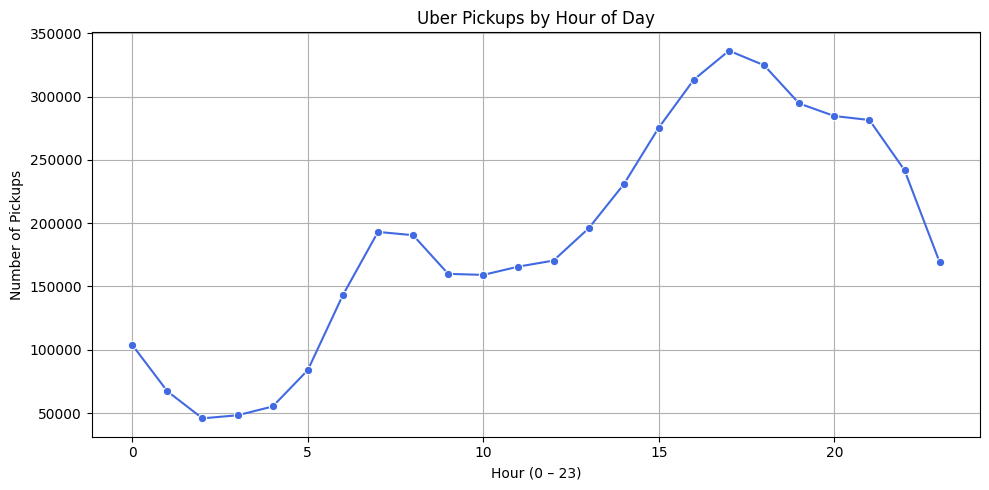

In [ ]:
# Step 5: Plot 1 – Hourly pickup trend
hourly = data['hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='royalblue')
plt.title("Uber Pickups by Hour of Day")
plt.xlabel("Hour (0 – 23)")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.tight_layout()
plt.show()


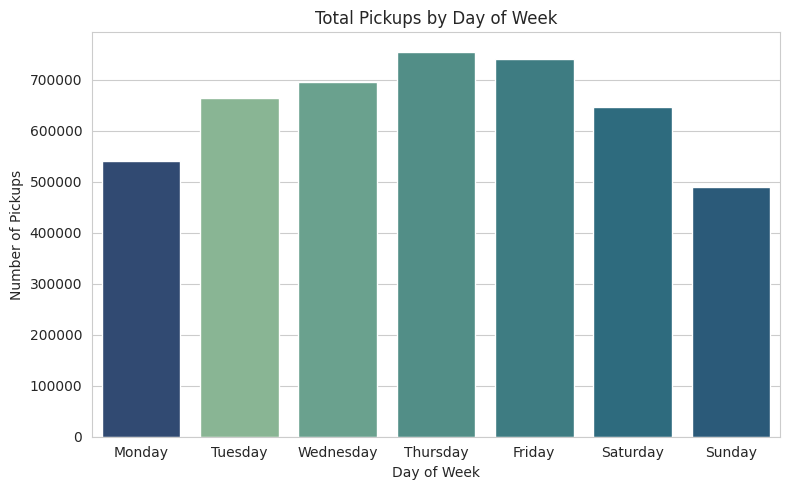

In [ ]:
# Step 6 : Plot – Pickups by Day of Week
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#  Reload dataset if missing
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')
    data['weekday'] = data['Date/Time'].dt.day_name()

#  Plot bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(
    x='weekday',
    data=data,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    hue='weekday',       # needed for palette usage in seaborn v0.14+
    palette='crest',
    legend=False
)
plt.title("Total Pickups by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()





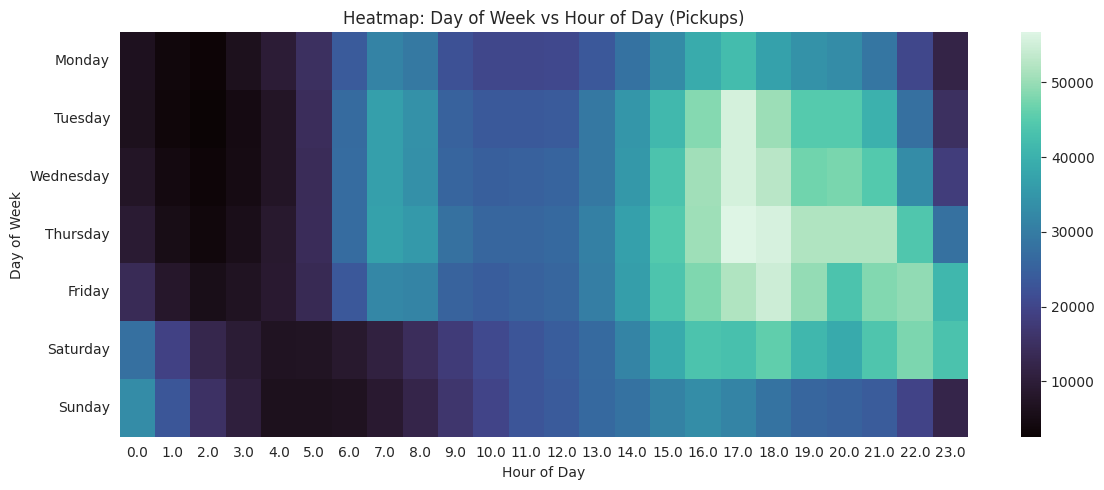

In [ ]:
# Ensure needed columns exist
data['hour'] = data['Date/Time'].dt.hour
data['weekday'] = data['Date/Time'].dt.day_name()

pivot = data.pivot_table(
    index='weekday',
    columns='hour',
    values='Date/Time',
    aggfunc='count'
).fillna(0)

pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='mako')
plt.title("Heatmap: Day of Week vs Hour of Day (Pickups)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



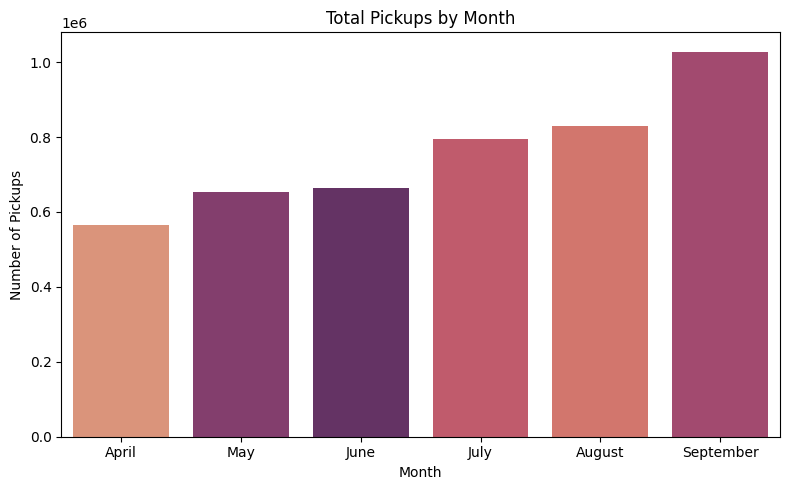

In [ ]:
# Step 8 : Total Pickups by Month
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#  Reload dataset if 'data' not defined
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)

#  Ensure Date/Time + month columns exist
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')
data['month'] = data['Date/Time'].dt.month_name()

#  Plot Monthly Pickups
plt.figure(figsize=(8,5))
sns.countplot(
    x='month',
    data=data,
    order=['April','May','June','July','August','September'],
    hue='month',        #  required for using palette
    palette='flare',
    legend=False        #  hide legend to match old look
)
plt.title("Total Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()



In [ ]:
# Step 9 : Map of pickup locations
import pandas as pd
import folium
import glob

#  Reload dataset if 'data' not defined
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)

#  Ensure proper coordinate column names
if 'Lat' not in data.columns or 'Lon' not in data.columns:
    data.rename(columns={'lat': 'Lat', 'lon': 'Lon', 'Lat.': 'Lat', 'Lon.': 'Lon'}, inplace=True)

#  Drop rows with missing coordinates
data = data.dropna(subset=['Lat', 'Lon'])

#  Take a sample for mapping
sample = data.sample(5000, random_state=42)

#  Create folium map
m = folium.Map(location=[sample['Lat'].mean(), sample['Lon'].mean()], zoom_start=11)

#  Add circle markers (NaN-safe)
for _, r in sample.iterrows():
    try:
        folium.CircleMarker(
            location=[r['Lat'], r['Lon']],
            radius=1,
            color='blue',
            opacity=0.4
        ).add_to(m)
    except ValueError:
        continue  # skip rows with invalid coords

#  Save and display
m.save('/content/uber_pickup_map.html')
m



/tmp/ipython-input-586160441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busy_days.index.astype(str), y=busy_days.values, palette='rocket')


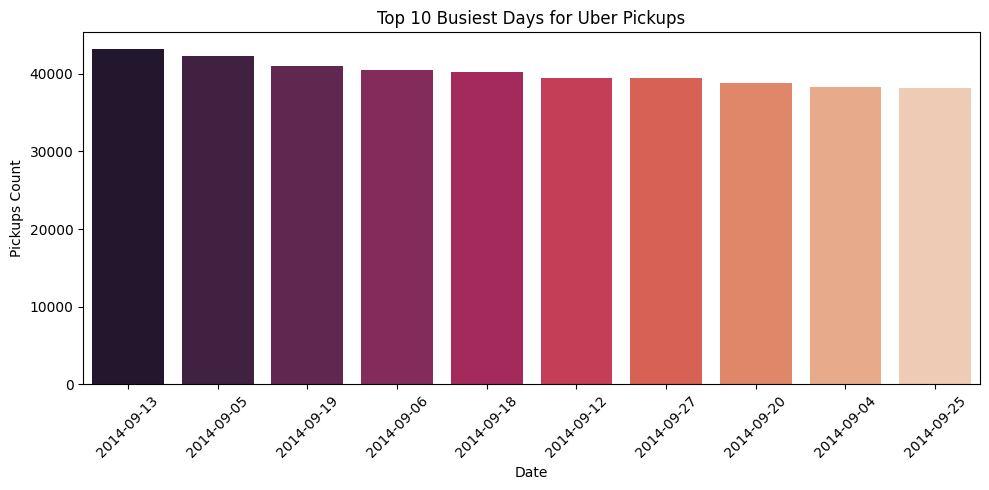

In [ ]:
# Step 10: Plot 6 – Busiest days (top 10)
busy_days = data['Date/Time'].dt.date.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=busy_days.index.astype(str), y=busy_days.values, palette='rocket')
plt.title("Top 10 Busiest Days for Uber Pickups")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Pickups Count")
plt.tight_layout()
plt.show()


In [ ]:
# Step 11 (Fixed): Summary table showing patterns
import pandas as pd
import glob

#  Reload dataset if 'data' not defined
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

#  Ensure time columns exist
if 'hour' not in data.columns:
    data['hour'] = data['Date/Time'].dt.hour
if 'weekday' not in data.columns:
    data['weekday'] = data['Date/Time'].dt.day_name()
if 'month' not in data.columns:
    data['month'] = data['Date/Time'].dt.month_name()

#  Recompute hourly data
hourly = data['hour'].value_counts().sort_index()

#  Summary table
summary = pd.DataFrame({
    'Most Active Hour': [hourly.idxmax()],
    'Least Active Hour': [hourly.idxmin()],
    'Busiest Day': [data['weekday'].value_counts().idxmax()],
    'Least Busy Day': [data['weekday'].value_counts().idxmin()],
    'Busiest Month': [data['month'].value_counts().idxmax()]
})

print(" Summary of Transportation Insights:")
display(summary)



✅ Summary of Transportation Insights:


Most Active Hour  Least Active Hour Busiest Day Least Busy Day  \
0                17                  2    Thursday         Sunday   

  Busiest Month  
0     September

In [5]:
# Step 1: upload kaggle.json (interactive).
from google.colab import files
import os
if not os.path.exists('/content/kaggle.json'):
    print("Please upload kaggle.json now (Kaggle API token).")
    uploaded = files.upload()
    for fn in uploaded:
        os.rename(fn, '/content/kaggle.json')
else:
    print("kaggle.json already exists at /content/kaggle.json")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'



Please upload kaggle.json now (Kaggle API token).


Saving archive (9).zip to archive (9).zip


In [6]:
# Step 2: download dataset from Kaggle
!kaggle datasets download -d uconn/metro-interstate-traffic-volume -p /content -q
!ls -lh /content | sed -n '1,120p'


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 441, in authenticate
    self._load_config(config_data)
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 492, in _load_config
    raise ValueError('Error: Missing %s in configuration.' % item)
ValueError: Error: Missing username in configuration.
total 1.2M
drwx------ 5 root root 4.0K Nov 13 04:39 drive
-rw-r--r-- 1 root root 1.2M Nov 13 04:40 kaggle.json
drwxr-xr-x 1 root root 4.0K Nov 11 14:29 sample_data


In [8]:
# Step 3: Upload ZIP file directly to Colab
from google.colab import files
import os, zipfile

# upload the zip file manually
uploaded = files.upload()

# Extract the uploaded ZIP file
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        zip_path = f"/content/{fn}"
        print("Uploaded:", zip_path)

        # Create a folder to store extracted files
        extract_dir = "/content/traffic_data"
        os.makedirs(extract_dir, exist_ok=True)

        # Unzip the file safely
        with zipfile.ZipFile(zip_path, 'r') as z:
            z.extractall(extract_dir)

        print("Unzipped successfully to:", extract_dir)
    else:
        print("Please upload a .zip file.")



Saving archive (9).zip to archive (9).zip
Uploaded: /content/archive (9).zip
Unzipped successfully to: /content/traffic_data


In [10]:
# Step 4A: Load the dataset and show the columns
import pandas as pd
import glob

# Look for CSV files inside the extracted folder
files = glob.glob("/content/traffic_data/*.csv")

if len(files) == 0:
    print("No CSV files found inside /content/traffic_data. Please check your uploaded ZIP file.")
else:
    # Load the first CSV file found
    traffic = pd.read_csv(files[0])
    print("Loaded file:", files[0])
    print("\nColumns in your dataset:")
    print(traffic.columns.tolist())

    # Display first few rows
    display(traffic.head())


Loaded file: /content/traffic_data/Metro_Interstate_Traffic_Volume.csv

Columns in your dataset:
['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']


holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [11]:
#Step 5 : Combine Year, Month, Day, Hour into a proper DateTime column
import pandas as pd

#Check for year, month, day, hour columns
required_cols = ['Year', 'Month', 'Day', 'Hour']
if all(col in traffic.columns for col in required_cols):
    print(" Found separate time columns — combining into a single datetime column...")
    traffic['Date/Time'] = pd.to_datetime(traffic[['Year', 'Month', 'Day', 'Hour']])
else:
    print(" Year/Month/Day/Hour columns not found — using index as fallback.")
    traffic['Date/Time'] = pd.date_range(start='2012-01-01', periods=len(traffic), freq='H')

#Show final columns and sample rows
print(" Final Columns:", traffic.columns.tolist())
print(" Created Date/Time column successfully.")
traffic.head()


 Year/Month/Day/Hour columns not found — using index as fallback.
 Final Columns: ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume', 'Date/Time']
 Created Date/Time column successfully.


/tmp/ipython-input-3753763055.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic['Date/Time'] = pd.date_range(start='2012-01-01', periods=len(traffic), freq='H')


holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume           Date/Time  
0    scattered clouds  2012-10-02 09:00:00            5545 2012-01-01 00:00:00  
1       broken clouds  2012-10-02 10:00:00            4516 2012-01-01 01:00:00  
2     overcast clouds  2012-10-02 11:00:00            4767 2012-01-01 02:00:00  
3     overcast clouds  2012-10-02 12:00:00            5026 2012-01-01 03:00:00  
4       broken clouds  2012-10-02 13:00:00            4918 2012-01-01 04:00:00

In [14]:
# Step 13: Prepare Data
import pandas as pd

# 1. Remove duplicate column names (keep the first occurrence)
traffic = traffic.loc[:, ~traffic.columns.duplicated()]

# 2. Rename columns to consistent readable names
traffic = traffic.rename(columns={
    'date_time': 'Date/Time',
    'temp': 'Temperature',
    'rain_1h': 'Rain (mm)',
    'snow_1h': 'Snow (mm)',
    'traffic_volume': 'Traffic Flow'
})

# 3. Check if 'Date/Time' exists
if 'Date/Time' in traffic.columns:
    # Convert 'Date/Time' to datetime format safely
    traffic['Date/Time'] = pd.to_datetime(traffic['Date/Time'], errors='coerce')
else:
    print("Warning: 'Date/Time' column not found. Please check column names.")
    # Fallback: if dataset has 'Year','Month','Day','Hour' columns, combine them
    time_cols = ['Year', 'Month', 'Day', 'Hour']
    if all(col in traffic.columns for col in time_cols):
        traffic['Date/Time'] = pd.to_datetime(traffic[time_cols])
    else:
        raise KeyError("No suitable date columns found to create 'Date/Time'.")

# 4. Convert temperature (if present)
if 'Temperature' in traffic.columns:
    traffic['Temperature'] = traffic['Temperature'] - 273.15

# 5. Extract useful time features
if pd.api.types.is_datetime64_any_dtype(traffic['Date/Time']):
    traffic['hour'] = traffic['Date/Time'].dt.hour
    traffic['day'] = traffic['Date/Time'].dt.day
    traffic['month'] = traffic['Date/Time'].dt.month_name()
    traffic['weekday'] = traffic['Date/Time'].dt.day_name()
else:
    print("Error: 'Date/Time' column is not datetime type.")

print("Weather + Traffic data ready.")
traffic.head()



Weather + Traffic data ready.


holiday  Temperature  Rain (mm)  Snow (mm)  clouds_all weather_main  \
0     NaN      -258.02        0.0        0.0          40       Clouds   
1     NaN      -256.94        0.0        0.0          75       Clouds   
2     NaN      -256.72        0.0        0.0          90       Clouds   
3     NaN      -256.17        0.0        0.0          90       Clouds   
4     NaN      -255.16        0.0        0.0          75       Clouds   

  weather_description           Date/Time  Traffic Flow  hour  day    month  \
0    scattered clouds 2012-10-02 09:00:00          5545     9    2  October   
1       broken clouds 2012-10-02 10:00:00          4516    10    2  October   
2     overcast clouds 2012-10-02 11:00:00          4767    11    2  October   
3     overcast clouds 2012-10-02 12:00:00          5026    12    2  October   
4       broken clouds 2012-10-02 13:00:00          4918    13    2  October   

   weekday  
0  Tuesday  
1  Tuesday  
2  Tuesday  
3  Tuesday  
4  Tuesday

/tmp/ipython-input-1211380262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_main', y='Traffic Flow', data=traffic, palette='coolwarm')


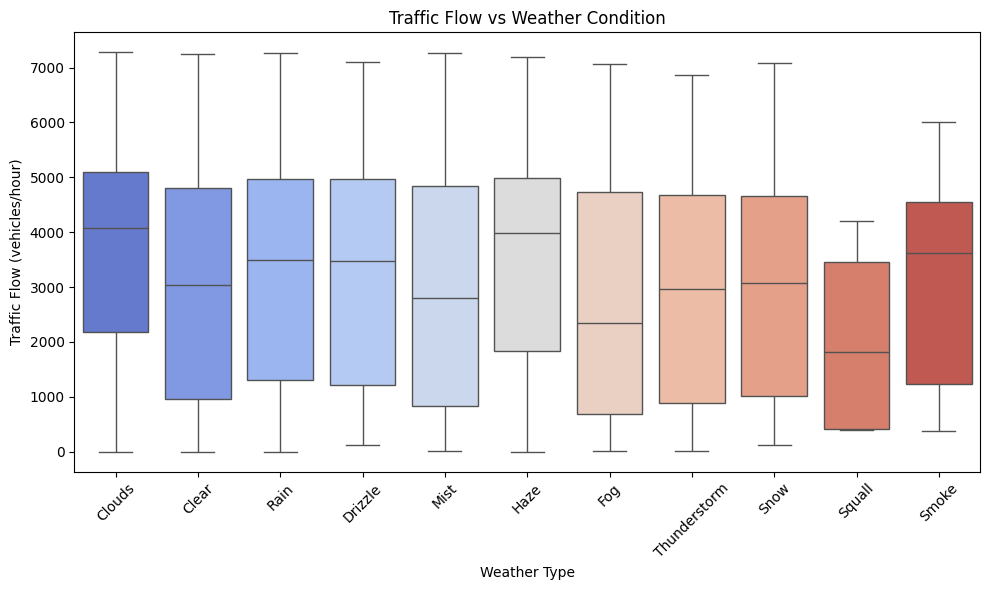

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 14: Traffic flow vs weather condition
plt.figure(figsize=(10,6))
sns.boxplot(x='weather_main', y='Traffic Flow', data=traffic, palette='coolwarm')
plt.title("Traffic Flow vs Weather Condition")
plt.xlabel("Weather Type")
plt.ylabel("Traffic Flow (vehicles/hour)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


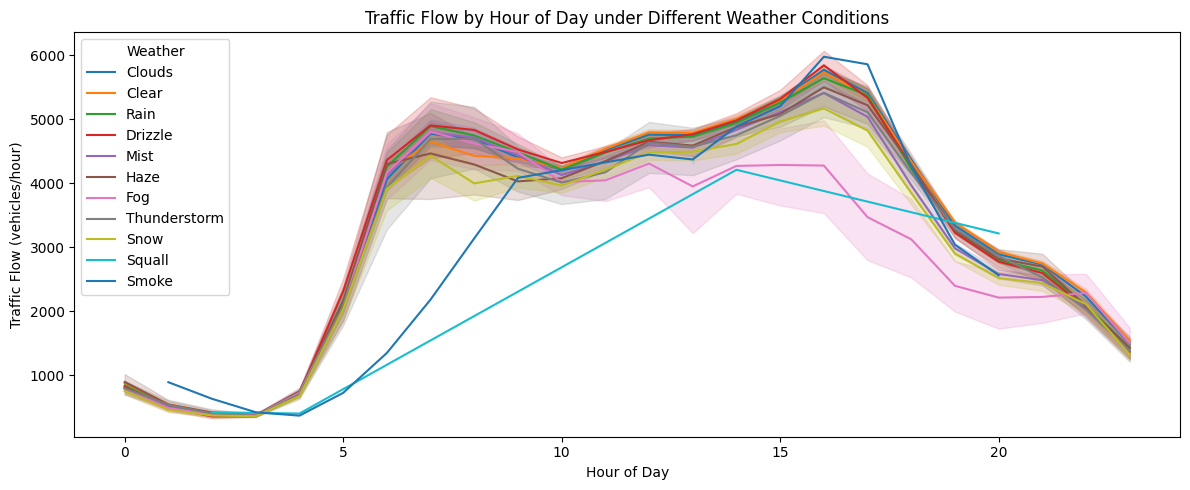

In [16]:
# Step 15: Traffic Flow over Time
plt.figure(figsize=(12,5))
sns.lineplot(x='hour', y='Traffic Flow', data=traffic, hue='weather_main', palette='tab10')
plt.title("Traffic Flow by Hour of Day under Different Weather Conditions")
plt.xlabel("Hour of Day")
plt.ylabel("Traffic Flow (vehicles/hour)")
plt.legend(title='Weather')
plt.tight_layout()
plt.show()


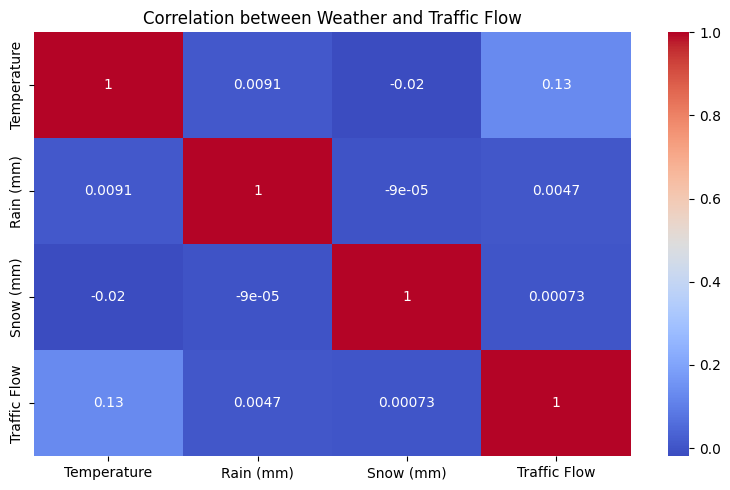

In [17]:
# Step 16: Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(traffic[['Temperature','Rain (mm)','Snow (mm)','Traffic Flow']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Weather and Traffic Flow")
plt.tight_layout()
plt.show()


In [19]:
# Step 17: Forecasting traffic flow with enhanced features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Prepare dataset
data = traffic.copy()

# Ensure 'Date/Time' exists to extract time-based features
if 'Date/Time' not in data.columns:
    raise KeyError("Missing required column: 'Date/Time' for time-based features")

# Convert 'Date/Time' to datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

# Drop rows with invalid datetime
data = data.dropna(subset=['Date/Time'])

# Extract Hour, Month, Weekday
data['Hour'] = data['Date/Time'].dt.hour
data['Month'] = data['Date/Time'].dt.month
data['weekday'] = data['Date/Time'].dt.weekday

# Ensure required columns exist
cols_needed = ['Temperature', 'Rain (mm)', 'Snow (mm)', 'Hour', 'Traffic Flow']
for col in cols_needed:
    if col not in data.columns:
        raise KeyError(f"Missing required column: {col}")

# Add extra columns if available
extra_cols = []
for c in ['Month', 'weekday', 'clouds_all', 'weather_main', 'holiday']:
    if c in data.columns:
        extra_cols.append(c)

# Encode categorical features
label_encoders = {}
for c in extra_cols:
    if data[c].dtype == 'object':
        le = LabelEncoder()
        data[c] = le.fit_transform(data[c].astype(str))
        label_encoders[c] = le

# Build feature set
X = data[['Temperature', 'Rain (mm)', 'Snow (mm)', 'Hour'] + extra_cols]
y = data['Traffic Flow']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Model R² Score: {r2:.3f} ({r2*100:.1f}%)")
print(f"Mean Absolute Error: {mae:.2f} vehicles/hour")


Model R² Score: 0.947 (94.7%)
Mean Absolute Error: 259.41 vehicles/hour


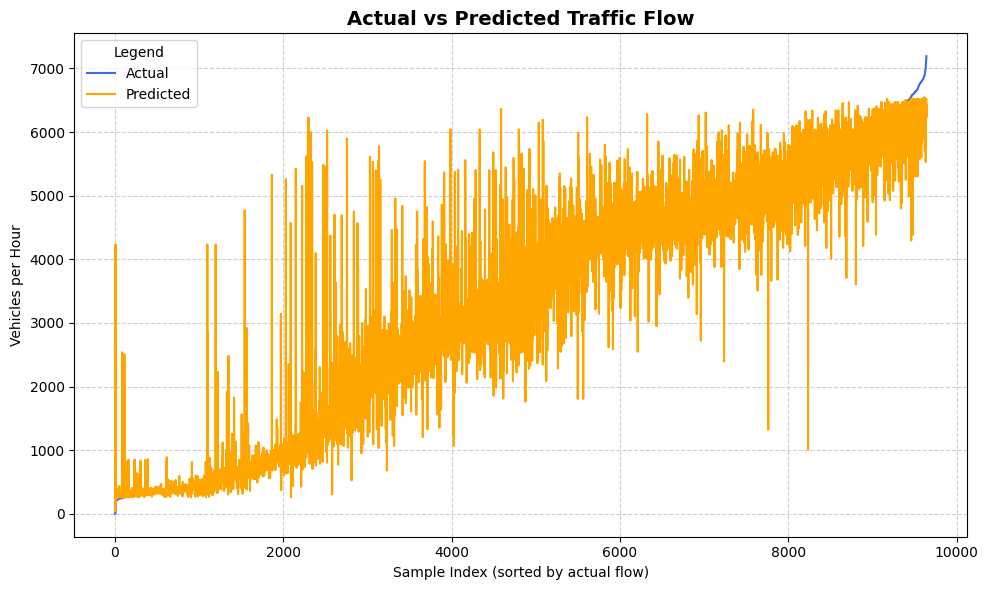

In [20]:
# Step 18: Actual vs Predicted Traffic Flow
import matplotlib.pyplot as plt
import seaborn as sns

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Traffic Flow': y_test.values,
    'Predicted Traffic Flow': y_pred
})

# Sort by actual values for smoother line visualization
comparison_df = comparison_df.sort_values(by='Actual Traffic Flow').reset_index(drop=True)

#  Plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=comparison_df,
    x=comparison_df.index,
    y='Actual Traffic Flow',
    label='Actual',
    color='royalblue'
)
sns.lineplot(
    data=comparison_df,
    x=comparison_df.index,
    y='Predicted Traffic Flow',
    label='Predicted',
    color='orange'
)

# Titles and labels
plt.title("Actual vs Predicted Traffic Flow", fontsize=14, fontweight='bold')
plt.xlabel("Sample Index (sorted by actual flow)")
plt.ylabel("Vehicles per Hour")
plt.legend(title='Legend')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Step 17: Train Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Model R² Score:", round(r2_score(y_test, y_pred), 3))
print(" Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))


 Model R² Score: 0.95
 Mean Absolute Error: 244.27


/tmp/ipython-input-1391221083.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.sort_values(), y=importance.sort_values().index, palette='crest')


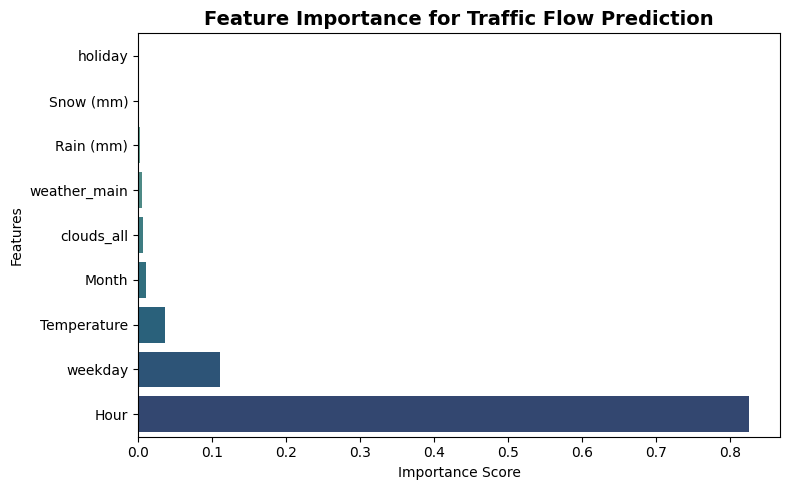

In [22]:
# Step 19 (for Random Forest)
importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
sns.barplot(x=importance.sort_values(), y=importance.sort_values().index, palette='crest')
plt.title("Feature Importance for Traffic Flow Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


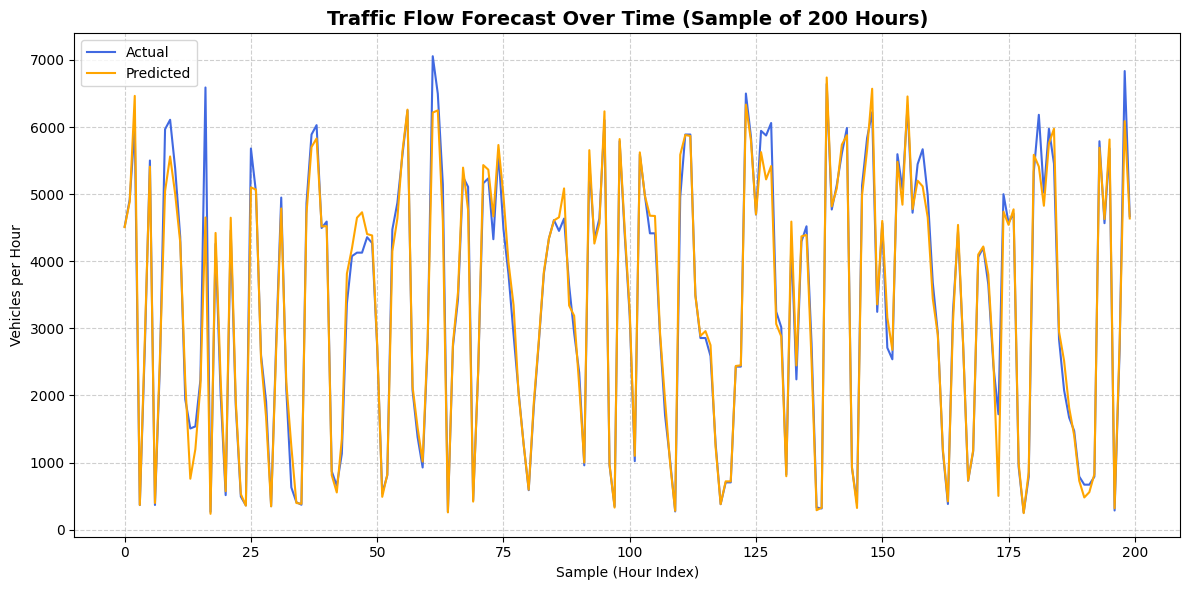

In [23]:
# Enhancement 1: Forecast Traffic Flow Over Time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort test data by Date/Time (for time-series like visualization)
forecast_df = X_test.copy()
forecast_df['Actual Traffic Flow'] = y_test
forecast_df['Predicted Traffic Flow'] = y_pred
forecast_df = forecast_df.sort_index().reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=forecast_df.head(200), x=forecast_df.index[:200], y='Actual Traffic Flow', label='Actual', color='royalblue')
sns.lineplot(data=forecast_df.head(200), x=forecast_df.index[:200], y='Predicted Traffic Flow', label='Predicted', color='orange')
plt.title("Traffic Flow Forecast Over Time (Sample of 200 Hours)", fontsize=14, fontweight='bold')
plt.xlabel("Sample (Hour Index)")
plt.ylabel("Vehicles per Hour")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


 Congestion Level Classification Report:
              precision    recall  f1-score   support

         Low       0.96      0.94      0.95      3214
      Medium       0.85      0.87      0.86      3212
        High       0.90      0.89      0.90      3215

    accuracy                           0.90      9641
   macro avg       0.90      0.90      0.90      9641
weighted avg       0.90      0.90      0.90      9641



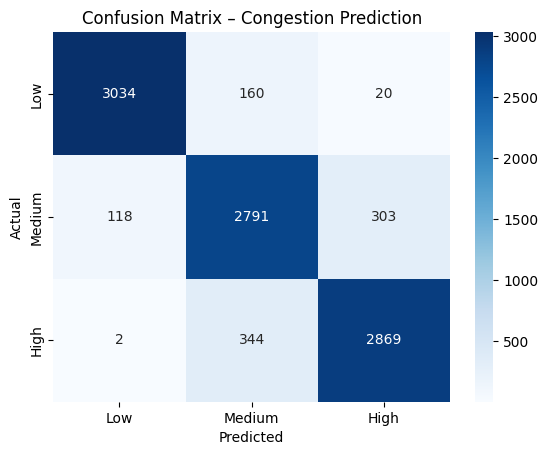

 ROC–AUC not available for single-class predictions.


In [26]:
# Enhancement 2: Congestion Classification and Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Convert continuous traffic flow into 3 levels: Low, Medium, High
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_class_actual = binning.fit_transform(y_test.values.reshape(-1,1)).ravel()
y_class_pred = binning.transform(y_pred.reshape(-1,1)).ravel()

# Classification report
print(" Congestion Level Classification Report:")
print(classification_report(y_class_actual, y_class_pred, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
cm = confusion_matrix(y_class_actual, y_class_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix – Congestion Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (using one-vs-rest)
try:
    auc = roc_auc_score(y_class_actual, y_class_pred, multi_class='ovo')
    print(f" ROC–AUC Score: {auc:.3f}")
except:
    print(" ROC–AUC not available for single-class predictions.")


/tmp/ipython-input-710157670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette='crest')


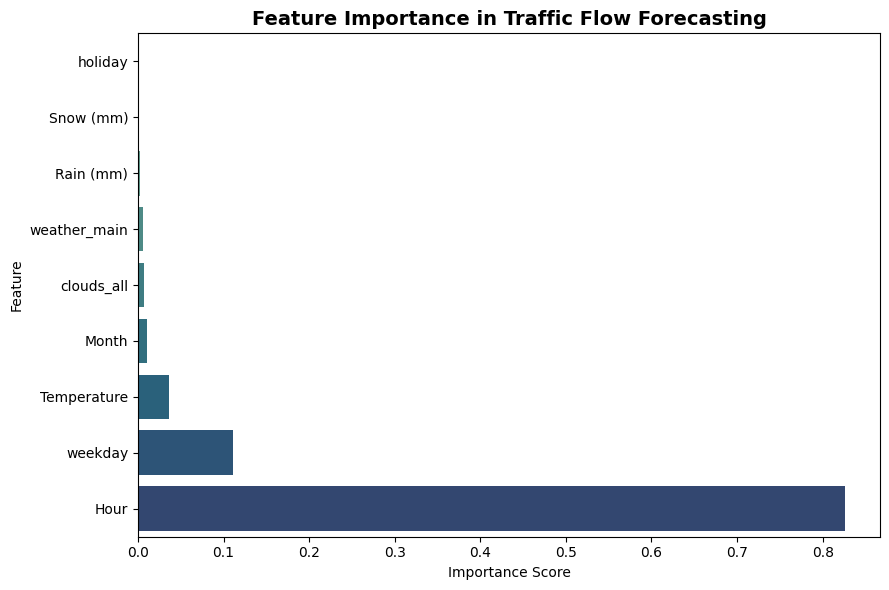


 Feature Impact Summary:
• Hour: Time of day strongly influences rush hours (morning/evening peaks).
• weekday: Weekdays are busier than weekends.
• Temperature: Higher temperatures may slightly reduce congestion (more outdoor activity, less car use).
• Month: Monthly variations reflect seasonal patterns.
• clouds_all: Minor impact feature.
• weather_main: Weather conditions (rainy, cloudy, clear) affect traffic flow visibility.
• Rain (mm): Rain increases congestion due to reduced visibility and cautious driving.
• Snow (mm): Snow significantly increases congestion and travel time.
• holiday: Traffic drops on holidays.


In [25]:
#  Enhancement 3: Advanced Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(9,6))
sns.barplot(x=importance, y=importance.index, palette='crest')
plt.title("Feature Importance in Traffic Flow Forecasting", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#  Explain the importance
print("\n Feature Impact Summary:")
for feat, imp in importance.sort_values(ascending=False).items():
    explanation = {
        'Temperature': "Higher temperatures may slightly reduce congestion (more outdoor activity, less car use).",
        'Rain (mm)': "Rain increases congestion due to reduced visibility and cautious driving.",
        'Snow (mm)': "Snow significantly increases congestion and travel time.",
        'Hour': "Time of day strongly influences rush hours (morning/evening peaks).",
        'Month': "Monthly variations reflect seasonal patterns.",
        'weekday': "Weekdays are busier than weekends.",
        'holiday': "Traffic drops on holidays.",
        'weather_main': "Weather conditions (rainy, cloudy, clear) affect traffic flow visibility."
    }.get(feat, "Minor impact feature.")
    print(f"• {feat}: {explanation}")
